<a href="https://colab.research.google.com/github/MittalNeha/EIP4/blob/master/Week2/Nineth_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


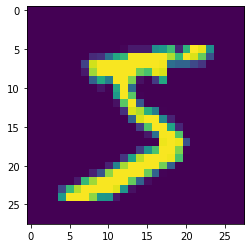

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
from keras.layers import Activation
model = Sequential()

# model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), bias=False)) # 26
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1),bias=False)) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu', bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))
# model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 12
model.add(Convolution2D(16, 1, 1, activation='relu', bias=False)) # 12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))


# model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 7
# model.add(BatchNormalization())
# # model.add(Dropout(0.25))
# model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu', bias=False)) # 8
model.add(BatchNormalization())
# model.add(Dropout(0.25))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 4

model.add(Convolution2D(10, 1, activation='relu', bias=False)) #3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu', bias=False)) #3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 2, 2, bias=False)) #1
model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykerne

In [36]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_51 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_44 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_52 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_45 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.03), metrics=['accuracy'])

In [38]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
60000/60000 [==============================] - 12s 200us/step - loss: 0.3021 - acc: 0.9298 - val_loss: 0.0593 - val_acc: 0.9817
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075815011.
60000/60000 [==============================] - 8s 133us/step - loss: 0.0935 - acc: 0.9747 - val_loss: 0.0414 - val_acc: 0.9879
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0061050061.
60000/60000 [==============================] - 8s 133us/step - loss: 0.0742 - acc: 0.9793 - val_loss: 0.0418 - val_acc: 0.9878
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.005109862.
60000/60000 [==============================] - 8s 133us/step - loss: 0.0618 - acc: 0.9828 - val_loss: 0.0296 - val_acc: 0.9910
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0043936731.
60000/60000 [=======

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [41]:
print(score)

[0.017622454202570952, 0.9943]
